# Logistic Regression

## 1. Prepare data

In [1]:
# run this cell to import nltk
import nltk
from os import getcwd

### Imported functions

Download the data needed for this assignment. Check out the [documentation for the twitter_samples dataset](http://www.nltk.org/howto/twitter.html).

* twitter_samples: if you're running this notebook on your local computer, you will need to download it using:
```Python
nltk.download('twitter_samples')
```

* stopwords: if you're running this notebook on your local computer, you will need to download it using:
```python
nltk.download('stopwords')
```

#### Import some helper functions that we provided in the utils.py file:
* `process_tweet()`: cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
* `build_freqs()`: this counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label '1' or a negative label '0', then builds the `freqs` dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.

In [2]:
# importing process_tweet function from utils folder
import sys  
sys.path.insert(0, 'D:/Jan July 2023/NLP/Code')

In [4]:
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 

from utils import process_tweet, build_freqs

### Prepare the data
* The `twitter_samples` contains subsets of 5,000 positive tweets, 5,000 negative tweets, and the full set of 10,000 tweets.  

In [5]:
# select the set of positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

* Train test split: 20% will be in the test set, and 80% in the training set.


In [6]:
# split the data into two pieces, one for training and one for testing (validation set) 
train_pos = positive_tweets[:4000]
test_pos = positive_tweets[4000:]

train_neg = negative_tweets[:4000]
test_neg = negative_tweets[4000:]


train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [7]:
len(train_x)

8000

In [8]:
type(train_x)

list

* Create the numpy array of positive labels and negative labels.

In [10]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [11]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [ ]:
# # Example of np.append(axis=0) meaning
# import numpy as np

# arr_merged = np.append([[1, 2], [3, 4]], [[10, 20], [30, 40]], axis=0)
# print(f'Merged 2x2 Arrays along Axis-0:\n{arr_merged}')

# arr_merged = np.append([[1, 2], [3, 4]], [[10, 20], [30, 40]], axis=1)
# print(f'Merged 2x2 Arrays along Axis-1:\n{arr_merged}')

In [12]:
# create frequency dictionary from training data
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11338


In [13]:
for pair in freqs.items():
    print(pair)
    break

(('followfriday', 1.0), 23)


## Part 2: Extracting the features

* Given a list of tweets, extract the features and store them in a matrix. You will extract two features.
    * The first feature is the number of positive words in a tweet.
    * The second feature is the number of negative words in a tweet. 
* Then train your logistic regression classifier on these features.
* Test the classifier on a validation set. 

### Instructions: Implement the extract_features function. 
* This function takes in a single tweet.
* Process the tweet using the imported `process_tweet()` function and save the list of tweet words.
* Loop through each word in the list of processed words
    * For each word, check the `freqs` dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
    * Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)


In [14]:
freqs

{('followfriday', 1.0): 23,
 ('top', 1.0): 30,
 ('engag', 1.0): 7,
 ('member', 1.0): 14,
 ('commun', 1.0): 27,
 ('week', 1.0): 72,
 (':)', 1.0): 2847,
 ('hey', 1.0): 60,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 80,
 ('call', 1.0): 27,
 ('contact', 1.0): 4,
 ('centr', 1.0): 1,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 6,
 ('assist', 1.0): 1,
 ('mani', 1.0): 28,
 ('thank', 1.0): 504,
 ('listen', 1.0): 14,
 ('last', 1.0): 39,
 ('night', 1.0): 55,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 41,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 15,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 57,
 ('blue', 1.0): 8,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 4,
 ('profil', 1.0): 2,
 ('15', 1.0): 4,
 ('day', 1.0): 187,
 ('one', 1.0): 90,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 16,
 ('like', 1.0): 187,
 ('keep', 1.0): 55,
 ('love', 1.0): 336,
 

In [15]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    word_l = process_tweet(tweet)
    x = np.zeros((3))
    
    #bias term is set to 1
    x[0] = 1 
    
    for word in word_l:
        
        x[1] += freqs.get((word, 1.0),0)
        x[2] += freqs.get((word, 0.0),0)

    return x

In [16]:
train_x[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

In [17]:
# Check your function
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[1.00e+00 3.02e+03 6.10e+01]


In [18]:
X= np.zeros((len(train_x),3))

for i in range(len(train_x)):
    X[i]= extract_features(train_x[i], freqs)
Y = train_y

In [19]:
X.shape

(8000, 3)

In [20]:
X.ndim

2

In [21]:
X

array([[1.000e+00, 3.020e+03, 6.100e+01],
       [1.000e+00, 3.573e+03, 4.440e+02],
       [1.000e+00, 3.005e+03, 1.150e+02],
       ...,
       [1.000e+00, 1.440e+02, 7.830e+02],
       [1.000e+00, 2.050e+02, 3.890e+03],
       [1.000e+00, 1.890e+02, 3.974e+03]])

In [ ]:
# Test tweet which does not exits in the freqs dictionary
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

## part 3- Logistic Regression
https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/

https://www.youtube.com/watch?v=2PfGO753UHk

https://www.jmp.com/en_in/statistics-knowledge-portal/what-is-correlation.html

It is used when our dependent variable is dichotomous or binary. It just means a variable that has only 2 outputs, for example, A person will survive this accident or not, The student will pass this exam or not. The outcome can either be yes or no (2 outputs). This regression technique is similar to linear regression and can be used to predict the Probabilities for classification problems.

### Why do we use Logistic Regression rather than Linear Regression?

1. we use logistic regression when our dependent variable is binary and in linear regression this dependent variable is continuous.
2. The second problem is that if we add an outlier in our dataset, the best fit line in linear regression shifts to fit that point.
3. Another problem with linear regression is that the predicted values may be out of range. We know that probability can be between 0 and 1, but if we use linear regression this probability may exceed 1 or go below 0.

To overcome these problems we use Logistic Regression, which converts this straight best fit line in linear regression to an S-curve using the sigmoid function, which will always give values between 0 and 1. 

## 3.1 Sigmoid function

**The equation of the best fit line in linear regression is:**

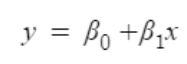

Let’s say instead of y we are taking probabilities (P). But there is an issue here, the value of (P) will exceed 1 or go below 0 and we know that range of Probability is (0-1). To overcome this issue we take “odds” of P:

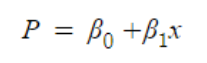

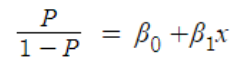

Odds are nothing but the ratio of the probability of success and probability of failure. We know that odds can always be positive which means the range will always be (0,+∞ ). 

There exists a problem - The range is restricted and we don’t want a restricted range because if we do so then our correlation will decrease. By restricting the range we are actually decreasing the number of data points and of course, if we decrease our data points, our correlation will decrease. It is difficult to model a variable that has a restricted range. To control this we take the log of odds which has a range from (-∞,+∞).

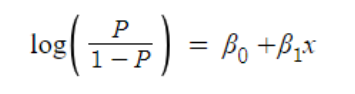

Now we just want a function of P because we want to predict probability right? not log of odds. To do so we will multiply by exponent on both sides and then solve for P.
We get the below equation-

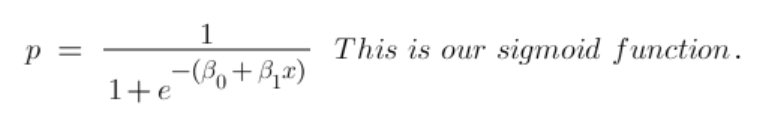

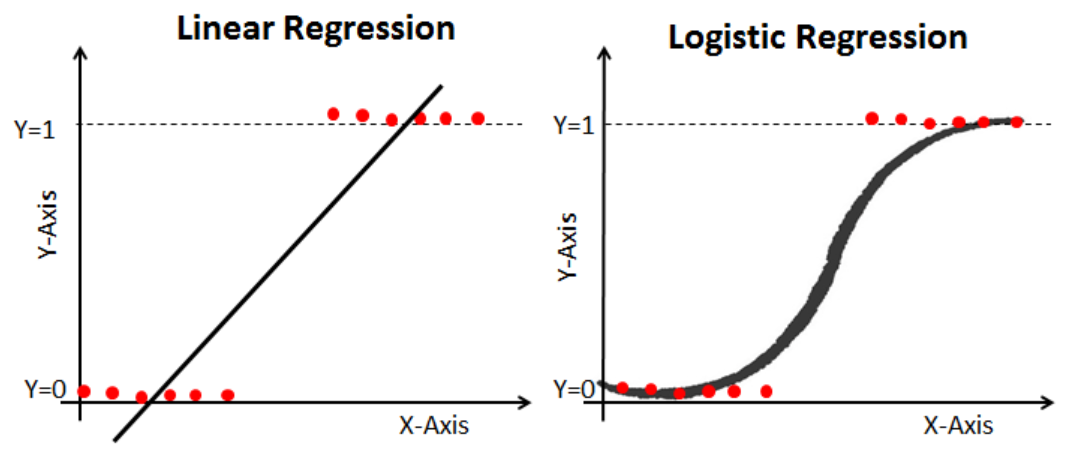

* The sigmoid function is defined as: 

$$ h(z) = \frac{1}{1+\exp^{-z}} \tag{1}$$

It maps the input 'z' to a value that ranges between 0 and 1, and so it can be treated as a probability.

### Logistic regression: regression and a sigmoid

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Regression:
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
Note that the $\theta$ values are "weights". If you took the Deep Learning Specialization, we referred to the weights with the `w` vector.  In this course, we're using a different variable $\theta$ to refer to the weights.

Logistic regression
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
We will refer to 'z' as the 'logits'.

In [22]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    h = 1 / (1 + np.exp(-z))
    return h

## 3.2 Cost Function in Logistic Regression
https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/

In linear regression, we use the Mean squared error as the cost function which was the difference between y_predicted and y_actual.

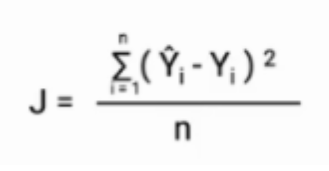

The graph of the cost function in linear regression is like this:


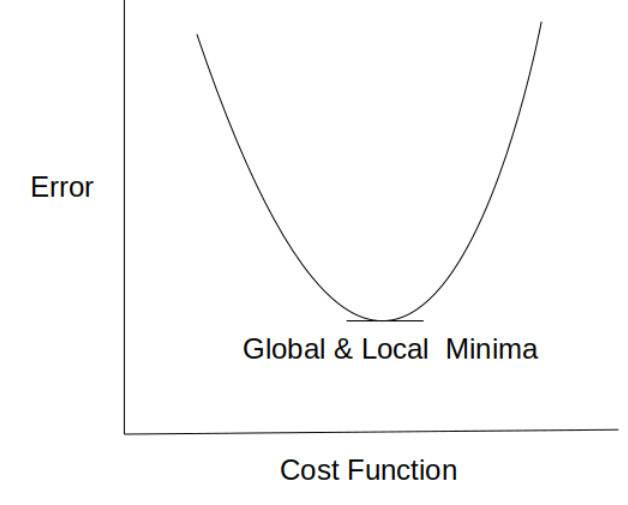

In logistic regression Yi is a non-linear function (Ŷ=1​/1+ e-z). If we use this in the above MSE equation then it will give a non-convex graph with many local minima as shown-

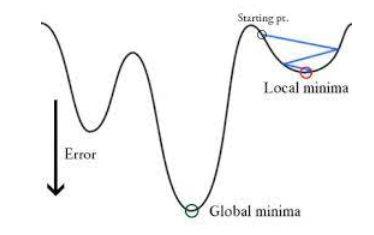

The problem here is that this cost function will give results with local minima, which is a big problem because then we’ll miss out on our global minima and our error will increase.

**In order to solve this problem, we derive a different cost function for logistic regression called log loss which is also derived from the maximum likelihood estimation method.**

The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of the i-th training example.
* $h(z(\theta)^{(i)})$ is the model's prediction for the i-th training example.

The loss function for a single training example is
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

Note- **What are log values between 0 and 1?**
Thus, for any base b > 1 logarithms of numbers between 0 and 1 are negative numbers, the logarithm of 1 is 0, and logarithms of numbers greater than 1 are positive real numbers as seen in the image below.

* All the $h$ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms.
* Note that when the model predicts 1 ($h(z(\theta)) = 1$) and the label $y$ is also 1, the loss for that training example is 0. 
* Similarly, when the model predicts 0 ($h(z(\theta)) = 0$) and the actual label is also 0, the loss for that training example is 0. 
* However, when the model prediction is close to 1 ($h(z(\theta)) = 0.9999$) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ The closer the model prediction gets to 1, the larger the loss.
* Likewise, if the model predicts close to 0 ($h(z) = 0.0001$) but the actual label is 1, the first term in the loss function becomes a large number: $-1 \times log(0.0001) \approx 9.2$.  The closer the prediction is to zero, the larger the loss.

## 3.3 Gradient Descent Optimization

**utilize Gradient Descent to compute the minimum cost**

Gradient descent changes the value of our weights in such a way that it always converges to minimum point or we can also say that, it aims at finding the optimal weights which minimize the loss function of our model. It is an iterative method that finds the minimum of a function by figuring out the slope at a random point and then moving in the opposite direction.

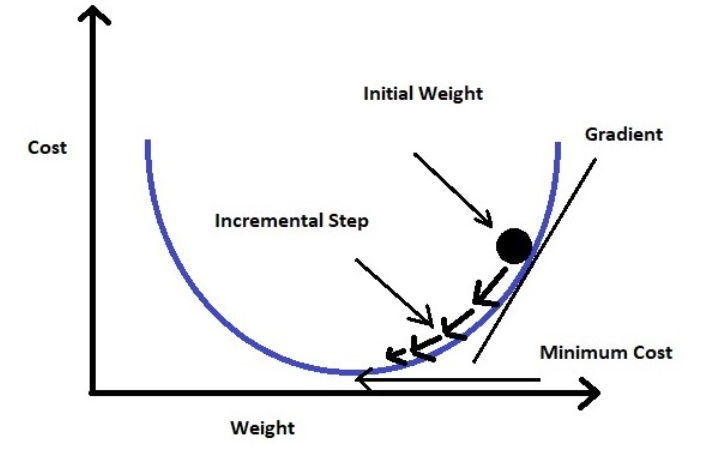

At first gradient descent takes a random value of our parameters from our function. Now we need an algorithm that will tell us whether at the next iteration we should move left or right to reach the minimum point. The gradient descent algorithm finds the slope of the loss function at that particular point and then in the next iteration, it moves in the opposite direction to reach the minima. Since we have a convex graph now we don’t need to worry about local minima. A convex curve will always have only 1 minima.

We can summarize the gradient descent algorithm as:

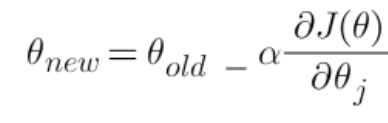

Here alpha is known as the learning rate. It determines the step size at each iteration while moving towards the minimum point. Usually, a lower value of “alpha” is preferred, because if the learning rate is a big number then we may miss the minimum point and keep on oscillating in the convex curve

## Implement gradient descent function
* The number of iterations `num_iters` is the number of times that you'll use the entire training set.
* For each iteration, you'll calculate the cost function using all training examples (there are `m` training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1) 
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>use np.dot for matrix multiplication.</li>
    <li>To ensure that the fraction -1/m is a decimal value, cast either the numerator or denominator (or both), like `float(1)`, or write `1.` for the float version of 1. </li>
</ul>
</p>



In [28]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    '''
    # get 'm', the number of rows in matrix x
    m = x.shape[0]
    
    for i in range(0, num_iters):
        z = np.dot(x,theta)
#         print(z)
        h = sigmoid(z)
#         print(h)
        # calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))    

        # update the weights theta
        theta= theta - (alpha/m) * np.dot(x.transpose(),(h-y))
#         print(J)
#         print(theta)
#         break
    ### END CODE HERE ###
    J = float(J)
    return J, theta

## 4. Training Your Model

To train the model:
* Stack the features for all training examples into a matrix `X`. 
* Call `gradientDescent`, which you've implemented above.

This section is given to you.  Please read it for understanding and run the cell.

In [25]:
X.shape

(8000, 3)

In [26]:
Y.shape

(8000, 1)

In [29]:
# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.24215474.
The resulting vector of weights is [7e-08, 0.00052391, -0.00055517]


**Expected Output**: 

```
The cost after training is 0.24216529.
The resulting vector of weights is [7e-08, 0.0005239, -0.00055517]
```

## 5.Test your logistic regression

It is time for you to test your logistic regression function on some new input that your model has not seen before. 

#### Instructions: Write `predict_tweet`
Predict whether a tweet is positive or negative.

* Given a tweet, process it, then extract the features.
* Apply the model's learned weights on the features to get the logits.
* Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).

$$y_{pred} = sigmoid(\mathbf{x} \cdot \theta)$$

In [37]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
        
    return y_pred

In [38]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.518581
I am bad -> 0.494339
this movie should have been great. -> 0.515331
great -> 0.515464
great great -> 0.530899
great great great -> 0.546274
great great great great -> 0.561562


**Expected Output**: 
```
I am happy -> 0.518580
I am bad -> 0.494339
this movie should have been great. -> 0.515331
great -> 0.515464
great great -> 0.530898
great great great -> 0.546273
great great great great -> 0.561561
```

In [39]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs, theta)

array([0.81636912])

## 6. Check performance using the test set
After training your model using the training set above, check how your model might perform on real, unseen data, by testing it against the test set.

#### Instructions: Implement `test_logistic_regression` 
* Given the test data and the weights of your trained model, calculate the accuracy of your logistic regression model. 
* Use your `predict_tweet()` function to make predictions on each tweet in the test set.
* If the prediction is > 0.5, set the model's classification `y_hat` to 1, otherwise set the model's classification `y_hat` to 0.
* A prediction is accurate when `y_hat` equals `test_y`.  Sum up all the instances when they are equal and divide by `m`.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>Use np.asarray() to convert a list to a numpy array</li>
    <li>Use np.squeeze() to make an (m,1) dimensional array into an (m,) array </li>
</ul>
</p>

In [40]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def test_logistic_regression(test_x, test_y, freqs, theta):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
        
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    
    return accuracy

In [41]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


#### Expected Output: 
```0.9950```  
Pretty good!

## 7.Error Analysis

In this part you will see some tweets that your model misclassified. Why do you think the misclassifications happened? Specifically what kind of tweets does your model misclassify?

In [49]:
# Some error analysis done for you
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x, sep= '\n', end='\n\n')
        print('THE PROCESSED TWEET IS:', process_tweet(x), sep= '\n', end='\n\n')
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')), end='\n\n')

THE TWEET IS:
@jaredNOTsubway @iluvmariah @Bravotv Then that truly is a LATERAL move! Now, we all know the Queen Bee is UPWARD BOUND : ) #MovingOnUp

THE PROCESSED TWEET IS:
['truli', 'later', 'move', 'know', 'queen', 'bee', 'upward', 'bound', 'movingonup']

1	0.49996920	b'truli later move know queen bee upward bound movingonup'

THE TWEET IS:
@MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p

THE PROCESSED TWEET IS:
['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']

1	0.48663815	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'

THE TWEET IS:
I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu

THE PROCESSED TWEET IS:
["i'm", 'play', 'brain', 'dot', 'braindot']

1	0.48370697	b"i'm play brain dot braindot"

THE TWEET IS:
I'm playing Brain 

Later in this specialization, we will see how we can use deep learning to improve the prediction performance.

# Part 6: Predict with your own tweet

In [50]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[0.48139084]
Negative sentiment
